# **INTRODUCTION**

Every machine learning project begins by understanding what the data and drawing the objectives. While applying machine learning algorithms to your data set, you are understanding, building and analyzing the data as to get the end result.

Following are the steps involved in creating a well-defined ML project:

1] Understand and define the problem

2] Prepare the data

3] Explore and Analyse the data

4] Apply the algorithms

5] Reduce the errors

6] Predict the result

To understand various machine learning algorithms let us use the Iris data set, one of the most famous datasets available.

**PROBLEM STATEMENT**

This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

**Understanding the Data**

Let us try to understand the basic desciption of the data , in terms of basic mathematics.

In [4]:
# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv("../Data/iris_dataset.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Analysing the data visually**

At the outset , let us look at a simple scatter plot , to get a visual feel of the data. (We are going to view a host of them)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


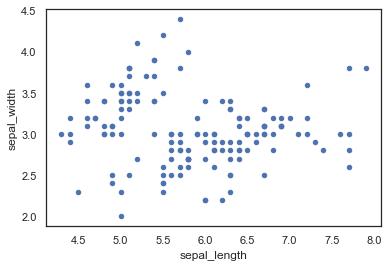

In [6]:
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")
warnings.filterwarnings("ignore")

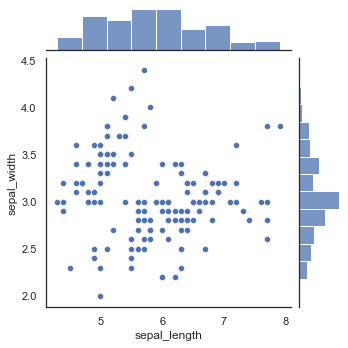

In [6]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)

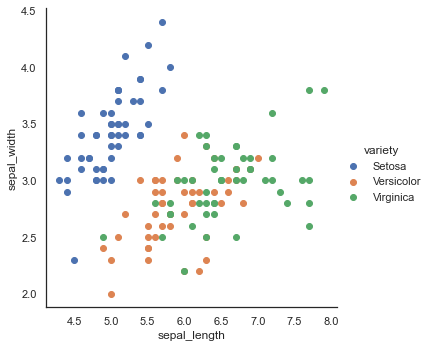

In [7]:
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="variety", size=5) \
   .map(plt.scatter,"sepal_length", "sepal_width") \
   .add_legend()

Secondly , let us see at the box plot of the dataset, which shows us the visual representation of how our data is scattered over the the plane. Box plot is a percentile-based graph, which divides the data into four quartiles of 25% each. This method is used in statistical analysis to understand various measures such as mean, median and deviation.

<AxesSubplot:xlabel='variety', ylabel='petal_length'>

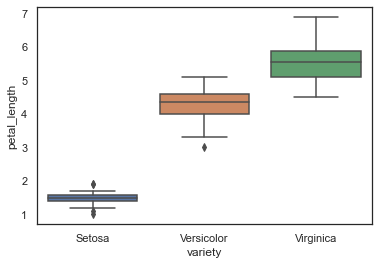

In [8]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="variety", y="petal_length", data=iris)

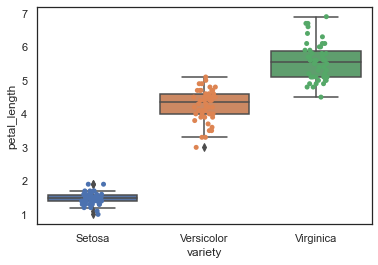

In [9]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot

# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="variety", y="petal_length", data=iris)
ax = sns.stripplot(x="variety", y="petal_length", data=iris, jitter=True, edgecolor="gray")

**This is a special plot called violin plot**

<AxesSubplot:xlabel='variety', ylabel='petal_length'>

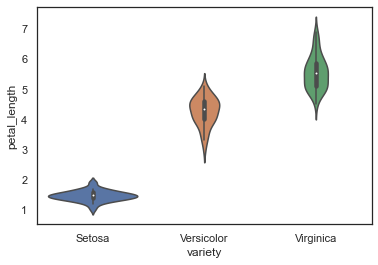

In [10]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="variety", y="petal_length", data=iris, size=6)

Next is a visual based on probability density , called kernel density plots. (KD Plots)

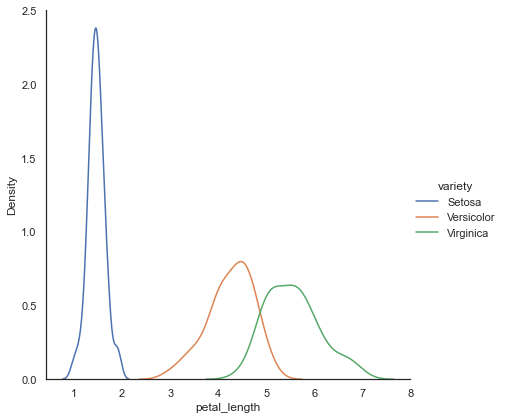

In [11]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="variety", size=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

**Another useful seaborn plot is a hybrid plot called pairplot, which shows the bivariate relation between each pair of features. Lets see the same**

In [12]:
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
#sns.pairplot(iris.drop("Id", axis=1), hue="variety", size=3)

In [13]:
# Box plot grid
# iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

And now , let's see some special visuals !! One cool more sophisticated technique pandas has available is called Andrews Curves

In [14]:
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
# from pandas.plotting import andrews_curves
# andrews_curves(iris.drop("Id", axis=1), "Species")

In [15]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
# from pandas.plotting import parallel_coordinates
# parallel_coordinates(iris.drop("Id", axis=1), "Species")

 A final multivariate visualization technique 

In [16]:

# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
# from pandas.plotting import radviz
# radviz(iris.drop("Id", axis=1), "Species")

# **INTO THE REALM OF MACHINE LEARNING**

**Dividing the data for training and testing**

Once we have understood what the dataset is about, we can start training a model based on the algorithms. Here, we will be implementing some of the commonly used algorithms in machine learning. Let us start by training our model with some of the samples. We will be using an inbuilt library called ‘train_test_split’ which divides our data set into a ratio of 80:20. 

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [9]:
# Seperating the data into dependent and independent variables
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Training the model**

Using some of the commonly used algorithms, we will be training our model to check how accurate every algorithm is. We will be implementing these algorithms to compare:

1] Logistic Regression

2] K – Nearest Neighbour (KNN)

3] Support Vector Machine (SVM)

4] Decision Trees

5] Naive Bayes classifier

Let us start building our model and predicting accuracy of every algorithm used. We can also check which gives the best result.

We can start with the first algorithm **Logistic Regression**. We can build our model like below:

In [10]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


Now , let us see the scores with **K-Nearest Neighbors** technique.

In [7]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


Thirdly , with **SVM (Support Vector Machines)**.

In [8]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#print(y_pred)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


Next , is my favorite , **decision trees** !

In [9]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(y_pred)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa']
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


And lastly , the **Naive Bayes classifier**. (Variants included)

In [10]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       0.93      1.00      0.96        13
   Virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy is 0.9666666666666667


In [24]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       0.00      0.00      0.00        13
   Virginica       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30

[[11  0  0]
 [ 0  0 13]
 [ 0  0  6]]
accuracy is 0.5666666666666667


In [25]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       0.00      0.00      0.00        11
  Versicolor       0.00      0.00      0.00        13
   Virginica       0.20      1.00      0.33         6

    accuracy                           0.20        30
   macro avg       0.07      0.33      0.11        30
weighted avg       0.04      0.20      0.07        30

[[ 0  0 11]
 [ 0  0 13]
 [ 0  0  6]]
accuracy is 0.2


In [ ]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),               
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)


In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

Note: This work is highly inspired from few other kaggle kernels , github sources and other data science resources. Any traces of replications, which may appear , is purely co-incidental. Due respect & credit to all  my fellow kagglers. Thanks !!